# Data Exploration and Preparation

This notebook contains my data cleaning and initial exploration of the data as part of Craigslist Housing analysis. The data was collected using a Craigslist scraper (please see Craigslist Housing Scraper and Multiple File Concatenation.ipynb) from Craiglist's Toronto website. The data was collected over a period of roughly 30 days during the month of April 2019. The data collection began consistently but becomes sporadic during the later part of the collection period.

In [1]:
import os
import glob
import pandas as pd
import re #regex for feature engineering
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
os.chdir("C:/Users/Jessee/Desktop/York University/CSDA1050/Craiglist Stream")

# Combined CSV
The data collected contains 12 features and 18,308 rows of data. There is a high quantity of duplication in this dataset as house listings can remain on the site for a number of days and will therefore show up on multiple days when scraping the site.

In [2]:
#import combined dataset
data = pd.read_csv("combined_csv.csv")
print (data.dtypes)
data

area          object
bedrooms     float64
datetime      object
geotag        object
has_image       bool
has_map         bool
id             int64
name          object
price         object
repost_of    float64
url           object
where         object
dtype: object


,area,bedrooms,datetime,geotag,has_image,has_map,id,name,price,repost_of,url,where
0,NaN,NaN,2019-04-18 01:25,"(8.635769, -83.161697)",True,True,6849459432,COSTA RICA - 42 ACRES - Ocean View Property wi...,$0,6.788157e+09,https://toronto.craigslist.org/tor/reb/d/toron...,"Golfo Dulce, Costa Rica"
1,NaN,NaN,2019-04-17 23:20,"(43.770681, -79.331202)",True,True,6869036815,Best Mortgage Rate Services (Lowest Mortgage R...,$0,6.546815e+09,https://toronto.craigslist.org/tor/reb/d/north...,NaN
2,NaN,NaN,2019-04-17 23:20,"(43.599707, -79.642778)",True,True,6869036743,Albert Lai Real Estate Services (Best Chinese ...,$0,6.546811e+09,https://toronto.craigslist.org/tor/reb/d/missi...,NaN
3,425ft2,1.0,2019-04-17 23:17,"(43.711301, -79.366495)",True,True,6863392610,Luxurious 1 Bedroom condo in Leaside,$419900,NaN,https://toronto.craigslist.org/tor/reo/d/east-...,Eglinton& Laird
4,850ft2,2.0,2019-04-17 23:10,"(43.661598, -79.386075)",True,True,6869033046,"Bright Spacious 2 Bedroom 2 Bath, Parking & Lo...",$975000,NaN,https://toronto.craigslist.org/tor/reb/d/toron...,832 Bay St
5,1000ft2,2.0,2019-04-17 22:56,"(43.653559, -79.368464)",True,True,6869022779,* * *WORTH EVERY PENNY,$875000,NaN,https://toronto.craigslist.org/tor/reb/d/toron...,323 Richmond St e
6,599ft2,1.0,2019-04-17 22:46,"(43.669861, -79.380386)",True,True,6867438300,^^Take the Landlord off the Payroll^^,$599000,NaN,https://toronto.craigslist.org/tor/reb/d/toron...,Yorkville
7,900ft2,1.0,2019-04-17 22:36,"(43.647293, -79.392995)",True,True,6869019736,~~~~~~~~~~~~~~Deal of the Day~~,$648000,NaN,https://toronto.craigslist.org/tor/reb/d/toron...,333 Adelaide St E
8,599ft2,1.0,2019-04-17 22:34,"(43.649537, -79.371122)",True,True,6869010236,"Desirable Neighborhood, Move-In Condition. Che...",$569900,NaN,https://toronto.craigslist.org/tor/reb/d/toron...,109 Front St E
9,1000ft2,2.0,2019-04-17 22:29,"(43.648828, -79.365881)",True,True,6869017082,~ ~ ~ ~ ~ A Sizzling Buy ~ ~ ~ ~ ~,$549900,NaN,https://toronto.craigslist.org/tor/reb/d/toron...,65 Scadding Ave


The data is filtered by unique id number to remove duplicates. The resultant data is saved as a new dataframe (data_sorted).

In [3]:
data_sort = data.sort_values("id")
data_sort = data_sort.drop_duplicates(subset=['id'], keep='first')
data_sort

,area,bedrooms,datetime,geotag,has_image,has_map,id,name,price,repost_of,url,where
5950,NaN,4.0,2019-03-06 16:31,"(45.486596, -75.520855)",True,True,6811622965,In-Laws welcome! Beautiful and updated home,$429000,NaN,https://toronto.craigslist.org/tor/reb/d/orlea...,"131 JUNIPER DR, Ottawa"
5951,NaN,NaN,2019-03-06 16:31,"(45.365176, -75.730921)",True,True,6811629545,Investors & builders take note!,$449000,NaN,https://toronto.craigslist.org/tor/reb/d/ottaw...,"1098 MERIVALE RD, Ottawa"
5953,NaN,NaN,2019-03-06 16:31,"(45.365176, -75.730921)",True,True,6811632903,Investors & builders take note!,$449000,NaN,https://toronto.craigslist.org/tor/reb/d/ottaw...,"1098 MERIVALE RD, Ottawa"
5952,NaN,NaN,2019-03-06 16:31,"(45.433332, -75.662335)",True,True,6811638278,Builder's delight!,$559000,NaN,https://toronto.craigslist.org/tor/reb/d/vanie...,"318 CYR AV, Ottawa"
5956,NaN,NaN,2019-03-06 16:31,"(45.437369, -76.374252)",True,True,6812457250,"Builders, investors delight!",$799900,NaN,https://toronto.craigslist.org/tor/reb/d/arnpr...,"5 STADACONNA ST, Arnprior"
9110,2100ft2,4.0,2019-03-07 17:06,"(43.188546, -79.836381)",True,True,6812910773,☢☢☢☢☢☢ STONEY CREEEK- PRE CONSTRUCTION DETAC,$659000,NaN,https://toronto.craigslist.org/tor/reb/d/hamil...,"510 Centennial Parkway North, Stoney Creek"
5838,950ft2,2.0,2019-03-07 17:12,"(43.569182, -79.567237)",False,True,6812921890,MISSISSAUGA LAKESHORE RD - UPSCALE ☵ URBAN TOW...,$579000,NaN,https://toronto.craigslist.org/tor/reb/d/missi...,"601 Lakeshore Rd East, Mississauga, ON"
5835,500ft2,1.0,2019-03-07 17:17,"(43.626406, -79.480574)",True,True,6812934716,⛰⛰⛰⛰ TORONTO- LAKEFRONT LUXURY ⛰⛰ CONDOS FR,$465000,NaN,https://toronto.craigslist.org/tor/reb/d/etobi...,"2167 Lakeshore Blwd West Etobicoke, ON"
5957,NaN,5.0,2019-03-06 16:30,"(45.346924, -75.816998)",True,True,6813240005,Beautiful & Spacious home!,$549000,NaN,https://toronto.craigslist.org/tor/reb/d/nepea...,"58 AERO DR, Ottawa"
9145,NaN,NaN,2019-03-07 12:17,"(46.373005, -83.909012)",True,True,6813633062,Waterfront Lot with scenic views!,$96000,NaN,https://toronto.craigslist.org/tor/reb/d/desba...,"Near Sault Ste. Marie, in Desbarats, ON"


# Data Cleaning

We employ a missmap to identify areas of missing data. We can see that two key features in our analysis, area and bedrooms, is missing a significant amount of data. Upon closer inspection, price also needed some cleaning/feature engineering as brokers were omitting or listing a $1 price value for listing manipulation.

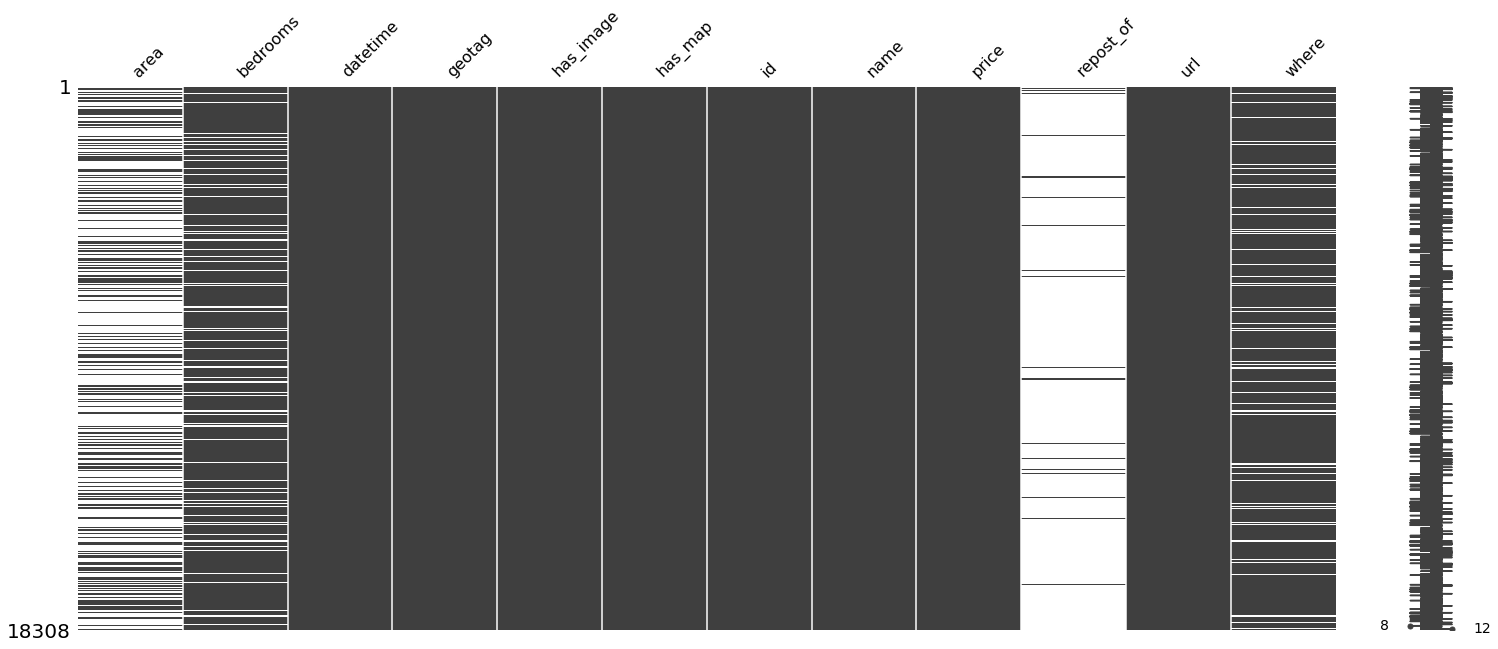

In [4]:
#Missmap
msno.matrix(data)

We first start by separating the area value from the unit of measurement. The measurement is stored in a seaprate columns'area_unit' incase it needs to be referenced. The remaining value in the area column is only a float value.

In [5]:
#separate unit of measure and 
data_sort['area_unit'] = data_sort['area'].str[-3:]
data_sort['area'] = data_sort['area'].str[:-3]
data_sort

,area,bedrooms,datetime,geotag,has_image,has_map,id,name,price,repost_of,url,where,area_unit
5950,NaN,4.0,2019-03-06 16:31,"(45.486596, -75.520855)",True,True,6811622965,In-Laws welcome! Beautiful and updated home,$429000,NaN,https://toronto.craigslist.org/tor/reb/d/orlea...,"131 JUNIPER DR, Ottawa",NaN
5951,NaN,NaN,2019-03-06 16:31,"(45.365176, -75.730921)",True,True,6811629545,Investors & builders take note!,$449000,NaN,https://toronto.craigslist.org/tor/reb/d/ottaw...,"1098 MERIVALE RD, Ottawa",NaN
5953,NaN,NaN,2019-03-06 16:31,"(45.365176, -75.730921)",True,True,6811632903,Investors & builders take note!,$449000,NaN,https://toronto.craigslist.org/tor/reb/d/ottaw...,"1098 MERIVALE RD, Ottawa",NaN
5952,NaN,NaN,2019-03-06 16:31,"(45.433332, -75.662335)",True,True,6811638278,Builder's delight!,$559000,NaN,https://toronto.craigslist.org/tor/reb/d/vanie...,"318 CYR AV, Ottawa",NaN
5956,NaN,NaN,2019-03-06 16:31,"(45.437369, -76.374252)",True,True,6812457250,"Builders, investors delight!",$799900,NaN,https://toronto.craigslist.org/tor/reb/d/arnpr...,"5 STADACONNA ST, Arnprior",NaN
9110,2100,4.0,2019-03-07 17:06,"(43.188546, -79.836381)",True,True,6812910773,☢☢☢☢☢☢ STONEY CREEEK- PRE CONSTRUCTION DETAC,$659000,NaN,https://toronto.craigslist.org/tor/reb/d/hamil...,"510 Centennial Parkway North, Stoney Creek",ft2
5838,950,2.0,2019-03-07 17:12,"(43.569182, -79.567237)",False,True,6812921890,MISSISSAUGA LAKESHORE RD - UPSCALE ☵ URBAN TOW...,$579000,NaN,https://toronto.craigslist.org/tor/reb/d/missi...,"601 Lakeshore Rd East, Mississauga, ON",ft2
5835,500,1.0,2019-03-07 17:17,"(43.626406, -79.480574)",True,True,6812934716,⛰⛰⛰⛰ TORONTO- LAKEFRONT LUXURY ⛰⛰ CONDOS FR,$465000,NaN,https://toronto.craigslist.org/tor/reb/d/etobi...,"2167 Lakeshore Blwd West Etobicoke, ON",ft2
5957,NaN,5.0,2019-03-06 16:30,"(45.346924, -75.816998)",True,True,6813240005,Beautiful & Spacious home!,$549000,NaN,https://toronto.craigslist.org/tor/reb/d/nepea...,"58 AERO DR, Ottawa",NaN
9145,NaN,NaN,2019-03-07 12:17,"(46.373005, -83.909012)",True,True,6813633062,Waterfront Lot with scenic views!,$96000,NaN,https://toronto.craigslist.org/tor/reb/d/desba...,"Near Sault Ste. Marie, in Desbarats, ON",NaN


The below code is removing the brackets from the geotag column that had data listed as a string in '(lat,long)' format. I first removed the brackets around the string and then separate the latitude and longitude values into stand alone columns.

In [6]:
#clean geotag: remove brackets
data_sort['geotag'] = data_sort['geotag'].str.strip('()')
#convert datetime from object to datetime format
data_sort['datetime'] = pd.to_datetime(data_sort['datetime'])
#create new attribute for date only
data_sort['date'] = data_sort['datetime'].dt.date
data_sort

,area,bedrooms,datetime,geotag,has_image,has_map,id,name,price,repost_of,url,where,area_unit,date
5950,NaN,4.0,2019-03-06 16:31:00,"45.486596, -75.520855",True,True,6811622965,In-Laws welcome! Beautiful and updated home,$429000,NaN,https://toronto.craigslist.org/tor/reb/d/orlea...,"131 JUNIPER DR, Ottawa",NaN,2019-03-06
5951,NaN,NaN,2019-03-06 16:31:00,"45.365176, -75.730921",True,True,6811629545,Investors & builders take note!,$449000,NaN,https://toronto.craigslist.org/tor/reb/d/ottaw...,"1098 MERIVALE RD, Ottawa",NaN,2019-03-06
5953,NaN,NaN,2019-03-06 16:31:00,"45.365176, -75.730921",True,True,6811632903,Investors & builders take note!,$449000,NaN,https://toronto.craigslist.org/tor/reb/d/ottaw...,"1098 MERIVALE RD, Ottawa",NaN,2019-03-06
5952,NaN,NaN,2019-03-06 16:31:00,"45.433332, -75.662335",True,True,6811638278,Builder's delight!,$559000,NaN,https://toronto.craigslist.org/tor/reb/d/vanie...,"318 CYR AV, Ottawa",NaN,2019-03-06
5956,NaN,NaN,2019-03-06 16:31:00,"45.437369, -76.374252",True,True,6812457250,"Builders, investors delight!",$799900,NaN,https://toronto.craigslist.org/tor/reb/d/arnpr...,"5 STADACONNA ST, Arnprior",NaN,2019-03-06
9110,2100,4.0,2019-03-07 17:06:00,"43.188546, -79.836381",True,True,6812910773,☢☢☢☢☢☢ STONEY CREEEK- PRE CONSTRUCTION DETAC,$659000,NaN,https://toronto.craigslist.org/tor/reb/d/hamil...,"510 Centennial Parkway North, Stoney Creek",ft2,2019-03-07
5838,950,2.0,2019-03-07 17:12:00,"43.569182, -79.567237",False,True,6812921890,MISSISSAUGA LAKESHORE RD - UPSCALE ☵ URBAN TOW...,$579000,NaN,https://toronto.craigslist.org/tor/reb/d/missi...,"601 Lakeshore Rd East, Mississauga, ON",ft2,2019-03-07
5835,500,1.0,2019-03-07 17:17:00,"43.626406, -79.480574",True,True,6812934716,⛰⛰⛰⛰ TORONTO- LAKEFRONT LUXURY ⛰⛰ CONDOS FR,$465000,NaN,https://toronto.craigslist.org/tor/reb/d/etobi...,"2167 Lakeshore Blwd West Etobicoke, ON",ft2,2019-03-07
5957,NaN,5.0,2019-03-06 16:30:00,"45.346924, -75.816998",True,True,6813240005,Beautiful & Spacious home!,$549000,NaN,https://toronto.craigslist.org/tor/reb/d/nepea...,"58 AERO DR, Ottawa",NaN,2019-03-06
9145,NaN,NaN,2019-03-07 12:17:00,"46.373005, -83.909012",True,True,6813633062,Waterfront Lot with scenic views!,$96000,NaN,https://toronto.craigslist.org/tor/reb/d/desba...,"Near Sault Ste. Marie, in Desbarats, ON",NaN,2019-03-07


In [7]:
#separate geotag into latitude and longitude variables.
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in data_sort['geotag']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
data_sort['latitude'] = lat
data_sort['longitude'] = lon

# Feature Engineering: Neighbourhood

Using the url field, I extract the neighbourhood listed in the url. I then create a new column that contains neighbourhood for futher analysis.

In [8]:
#extract neighbourhood from 'url' for realestate-owner (reo) and realestate-broker (reb) pages
reb = data_sort['url'].str.extract('https://toronto.craigslist.org/tor/reb/d/([^-]*)')
reo = data_sort['url'].str.extract('https://toronto.craigslist.org/tor/reo/d/([^-]*)')
data_sort['reb'] = reb
data_sort['reo'] = reo
#replace NAN in reo using the values in reb
data_sort['reb'].fillna(data_sort['reo'], inplace=True)
#clean names 
data_sort['reb'] = data_sort['reb'].str.replace('east','east-toronto')
data_sort['reb'] = data_sort['reb'].str.replace('west','west-toronto')
data_sort['reb'] = data_sort['reb'].str.replace('north','north-toronto')
data_sort['reb'] = data_sort['reb'].str.replace('south','south-toronto')
data_sort['reb'] = data_sort['reb'].str.replace('coe','coe-hill')
#delete reo and move results in neighbourhood field

data_sort['neighbourhood'] = data_sort['reb']
del data_sort['reo']
del data_sort['reb']

data_sort
#sources
#(replace string)https://stackoverflow.com/questions/28986489/python-pandas-how-to-replace-a-characters-in-a-column-of-a-dataframe
#(replace NAN with another column)https://stackoverflow.com/questions/29177498/python-pandas-replace-nan-in-one-column-with-value-from-corresponding-row-of-sec

,area,bedrooms,datetime,geotag,has_image,has_map,id,name,price,repost_of,url,where,area_unit,date,latitude,longitude,neighbourhood
5950,NaN,4.0,2019-03-06 16:31:00,"45.486596, -75.520855",True,True,6811622965,In-Laws welcome! Beautiful and updated home,$429000,NaN,https://toronto.craigslist.org/tor/reb/d/orlea...,"131 JUNIPER DR, Ottawa",NaN,2019-03-06,45.486596,-75.520855,orleans
5951,NaN,NaN,2019-03-06 16:31:00,"45.365176, -75.730921",True,True,6811629545,Investors & builders take note!,$449000,NaN,https://toronto.craigslist.org/tor/reb/d/ottaw...,"1098 MERIVALE RD, Ottawa",NaN,2019-03-06,45.365176,-75.730921,ottawa
5953,NaN,NaN,2019-03-06 16:31:00,"45.365176, -75.730921",True,True,6811632903,Investors & builders take note!,$449000,NaN,https://toronto.craigslist.org/tor/reb/d/ottaw...,"1098 MERIVALE RD, Ottawa",NaN,2019-03-06,45.365176,-75.730921,ottawa
5952,NaN,NaN,2019-03-06 16:31:00,"45.433332, -75.662335",True,True,6811638278,Builder's delight!,$559000,NaN,https://toronto.craigslist.org/tor/reb/d/vanie...,"318 CYR AV, Ottawa",NaN,2019-03-06,45.433332,-75.662335,vanier
5956,NaN,NaN,2019-03-06 16:31:00,"45.437369, -76.374252",True,True,6812457250,"Builders, investors delight!",$799900,NaN,https://toronto.craigslist.org/tor/reb/d/arnpr...,"5 STADACONNA ST, Arnprior",NaN,2019-03-06,45.437369,-76.374252,arnprior
9110,2100,4.0,2019-03-07 17:06:00,"43.188546, -79.836381",True,True,6812910773,☢☢☢☢☢☢ STONEY CREEEK- PRE CONSTRUCTION DETAC,$659000,NaN,https://toronto.craigslist.org/tor/reb/d/hamil...,"510 Centennial Parkway North, Stoney Creek",ft2,2019-03-07,43.188546,-79.836381,hamilton
5838,950,2.0,2019-03-07 17:12:00,"43.569182, -79.567237",False,True,6812921890,MISSISSAUGA LAKESHORE RD - UPSCALE ☵ URBAN TOW...,$579000,NaN,https://toronto.craigslist.org/tor/reb/d/missi...,"601 Lakeshore Rd East, Mississauga, ON",ft2,2019-03-07,43.569182,-79.567237,mississauga
5835,500,1.0,2019-03-07 17:17:00,"43.626406, -79.480574",True,True,6812934716,⛰⛰⛰⛰ TORONTO- LAKEFRONT LUXURY ⛰⛰ CONDOS FR,$465000,NaN,https://toronto.craigslist.org/tor/reb/d/etobi...,"2167 Lakeshore Blwd West Etobicoke, ON",ft2,2019-03-07,43.626406,-79.480574,etobicoke
5957,NaN,5.0,2019-03-06 16:30:00,"45.346924, -75.816998",True,True,6813240005,Beautiful & Spacious home!,$549000,NaN,https://toronto.craigslist.org/tor/reb/d/nepea...,"58 AERO DR, Ottawa",NaN,2019-03-06,45.346924,-75.816998,nepean
9145,NaN,NaN,2019-03-07 12:17:00,"46.373005, -83.909012",True,True,6813633062,Waterfront Lot with scenic views!,$96000,NaN,https://toronto.craigslist.org/tor/reb/d/desba...,"Near Sault Ste. Marie, in Desbarats, ON",NaN,2019-03-07,46.373005,-83.909012,desbarats


# Feature Engineering: Price Extraction
Earlier I identified that the price field has missing/false information listed in the field. I attempt to correct the data by extracting price information from the listing title. I first convert the data into text by removing unicode (emoji) text and non-latin characters. 

In [9]:
data_sort['text'] = data_sort['name'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)#remove unicode (emoji text)
data_sort['text'].head()


5950    In-Laws welcome Beautiful and updated home
5951                 Investors  builders take note
5953                 Investors  builders take note
5952                              Builders delight
5956                   Builders, investors delight
Name: text, dtype: object

I can now use a regex function to extract the price information in the heading into a new column 'price_ext). I then format the text to remove the dollar signs, commas and square brackets. The data types are then changed to numeric values.

In [10]:
regex = re.compile(r'\d+[,]\d+[,]?\d+')
def get_price(x):
    return ''.join(regex.findall(x)).replace(',','') #join removes square brackets from list

data_sort['price_ext'] = data_sort['text'].apply(get_price)

In [11]:
data_sort['price'] = data_sort['price'].apply(lambda x: x.replace('$',''))
data_sort['price'] = data_sort['price'].apply(lambda x: x.replace(',',''))

In [12]:
data_sort['price'] = pd.to_numeric(data_sort['price'])
data_sort['price_ext'] = pd.to_numeric(data_sort['price_ext'])
data_sort.dtypes

area                     object
bedrooms                float64
datetime         datetime64[ns]
geotag                   object
has_image                  bool
has_map                    bool
id                        int64
name                     object
price                     int64
repost_of               float64
url                      object
where                    object
area_unit                object
date                     object
latitude                 object
longitude                object
neighbourhood            object
text                     object
price_ext               float64
dtype: object

Based on viewing the data, I replace all listings with a dollar value <$2 with a price in the extracted price column. 

In [13]:
#replace price when price is $2 or less using price_ext (price extracted from title using regex)
data_sort['price'] = np.where(data_sort['price'] < 2, data_sort['price_ext'], data_sort['price'])

# Feature Engineering: Bedroom Extration

I repeat the process used for extracting price and amend the regex function to locate several variations of bedrooms listed in the text. 

In [14]:
#define regex functions for bedroom extraction
regex2 = re.compile(r'(\d+)[\s]?(?i)BR ')
regex4 = re.compile(r'(\d+)[\s]?(?i)BED ')
#regex4 = re.compile(r'(\d+)[\s]?(?i)br')
regex3 = re.compile(r'(\d+)[\s]?(?i)BD ')
#regex5 = re.compile(r'(\d+)[\s]?(?i)bd')
#create functions to extract each variation of bedroom
def get_BR(x):
    return ''.join(regex2.findall(x)).replace(',','') #join removes square brackets from list
def get_BED(x):
    return ''.join(regex4.findall(x)).replace(',','') #join removes square brackets from list
#def get_br(x):
#    return ''.join(regex3.findall(x)).replace(',','') #join removes square brackets from list
def get_BD(x):
    return ''.join(regex3.findall(x)).replace(',','') #join removes square brackets from list
#def get_bd(x):
#    return ''.join(regex5.findall(x)).replace(',','') #join removes square brackets from list

data_sort['BR'] = data_sort['text'].apply(get_BR)
#data_sort['br'] = data_sort['text'].apply(get_br)
data_sort['BD'] = data_sort['text'].apply(get_BD)
data_sort['BED'] = data_sort['text'].apply(get_BED)
#data_sort['bd'] = data_sort['text'].apply(get_bd)
#data_sort[['BR','br','BD','bd']]
#combine columns into bed extracted column
data_sort['bed_ext'] = data_sort['BR']+data_sort['BD']+data_sort['BED']
data_sort['bed_ext'] = data_sort['bed_ext'].str[:1]
#data_sort.to_csv( "testbd4_csv.csv", index=False, encoding='utf-8-sig')

C:\Users\Jessee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Flags not at the start of the expression '(\\d+)[\\s]?(?i)BR '
  
C:\Users\Jessee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Flags not at the start of the expression '(\\d+)[\\s]?(?i)BED '
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jessee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Flags not at the start of the expression '(\\d+)[\\s]?(?i)BD '
  """


I then replace any NAN values in the bedrooms field using the extract bedroom values.

In [15]:
#replace bed when price is $2 or less using price_ext (price extracted from title using regex)
#data_sort['price'] = np.where(data_sort['price'] < 2, data_sort['price_ext'], data_sort['price'])
data_sort['bedrooms'].fillna(data_sort['bed_ext'], inplace=True)
data_sort


,area,bedrooms,datetime,geotag,has_image,has_map,id,name,price,repost_of,...,date,latitude,longitude,neighbourhood,text,price_ext,BR,BD,BED,bed_ext
5950,NaN,4,2019-03-06 16:31:00,"45.486596, -75.520855",True,True,6811622965,In-Laws welcome! Beautiful and updated home,429000.0,NaN,...,2019-03-06,45.486596,-75.520855,orleans,In-Laws welcome Beautiful and updated home,NaN,,,,
5951,NaN,,2019-03-06 16:31:00,"45.365176, -75.730921",True,True,6811629545,Investors & builders take note!,449000.0,NaN,...,2019-03-06,45.365176,-75.730921,ottawa,Investors builders take note,NaN,,,,
5953,NaN,,2019-03-06 16:31:00,"45.365176, -75.730921",True,True,6811632903,Investors & builders take note!,449000.0,NaN,...,2019-03-06,45.365176,-75.730921,ottawa,Investors builders take note,NaN,,,,
5952,NaN,,2019-03-06 16:31:00,"45.433332, -75.662335",True,True,6811638278,Builder's delight!,559000.0,NaN,...,2019-03-06,45.433332,-75.662335,vanier,Builders delight,NaN,,,,
5956,NaN,,2019-03-06 16:31:00,"45.437369, -76.374252",True,True,6812457250,"Builders, investors delight!",799900.0,NaN,...,2019-03-06,45.437369,-76.374252,arnprior,"Builders, investors delight",NaN,,,,
9110,2100,4,2019-03-07 17:06:00,"43.188546, -79.836381",True,True,6812910773,☢☢☢☢☢☢ STONEY CREEEK- PRE CONSTRUCTION DETAC,659000.0,NaN,...,2019-03-07,43.188546,-79.836381,hamilton,STONEY CREEEK- PRE CONSTRUCTION DETAC,NaN,,,,
5838,950,2,2019-03-07 17:12:00,"43.569182, -79.567237",False,True,6812921890,MISSISSAUGA LAKESHORE RD - UPSCALE ☵ URBAN TOW...,579000.0,NaN,...,2019-03-07,43.569182,-79.567237,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWN...,NaN,,,,
5835,500,1,2019-03-07 17:17:00,"43.626406, -79.480574",True,True,6812934716,⛰⛰⛰⛰ TORONTO- LAKEFRONT LUXURY ⛰⛰ CONDOS FR,465000.0,NaN,...,2019-03-07,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FR,NaN,,,,
5957,NaN,5,2019-03-06 16:30:00,"45.346924, -75.816998",True,True,6813240005,Beautiful & Spacious home!,549000.0,NaN,...,2019-03-06,45.346924,-75.816998,nepean,Beautiful Spacious home,NaN,,,,
9145,NaN,,2019-03-07 12:17:00,"46.373005, -83.909012",True,True,6813633062,Waterfront Lot with scenic views!,96000.0,NaN,...,2019-03-07,46.373005,-83.909012,desbarats,Waterfront Lot with scenic views,NaN,,,,


# Generating a Cleaned Dataset

In [16]:
#Final cleaned dataset
df = data_sort[['id','area','bedrooms','date','price','latitude', 'longitude', 'neighbourhood','text']]
df

,id,area,bedrooms,date,price,latitude,longitude,neighbourhood,text
5950,6811622965,NaN,4,2019-03-06,429000.0,45.486596,-75.520855,orleans,In-Laws welcome Beautiful and updated home
5951,6811629545,NaN,,2019-03-06,449000.0,45.365176,-75.730921,ottawa,Investors builders take note
5953,6811632903,NaN,,2019-03-06,449000.0,45.365176,-75.730921,ottawa,Investors builders take note
5952,6811638278,NaN,,2019-03-06,559000.0,45.433332,-75.662335,vanier,Builders delight
5956,6812457250,NaN,,2019-03-06,799900.0,45.437369,-76.374252,arnprior,"Builders, investors delight"
9110,6812910773,2100,4,2019-03-07,659000.0,43.188546,-79.836381,hamilton,STONEY CREEEK- PRE CONSTRUCTION DETAC
5838,6812921890,950,2,2019-03-07,579000.0,43.569182,-79.567237,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWN...
5835,6812934716,500,1,2019-03-07,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FR
5957,6813240005,NaN,5,2019-03-06,549000.0,45.346924,-75.816998,nepean,Beautiful Spacious home
9145,6813633062,NaN,,2019-03-07,96000.0,46.373005,-83.909012,desbarats,Waterfront Lot with scenic views


# Subject Filtering

Since my analysis will focus on Toronto region, some filtering is done on the dataset to remove listing beyond the scope. By viewing the data, I identfied several listing made on the Toronto website relating to investments abroad. I attempt to filter these listings out by remove any listings with latitudes outside the range of Toronto region (lat: 43.0 to 43.9).

In [17]:
#FILTER filter out locations not located in Toronto/GTA (some postings are in USA)
df['lat_ext'] = df['latitude'].str[:2]
df['lat_ext'] = pd.to_numeric(df['lat_ext'])

#df = df[df['lat_ext'] > 43.0] 
df
lat_range = ['43.0','43.9']
df = df[df['lat_ext'].isin(lat_range)]
df

C:\Users\Jessee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jessee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,area,bedrooms,date,price,latitude,longitude,neighbourhood,text,lat_ext
9110,6812910773,2100,4,2019-03-07,659000.0,43.188546,-79.836381,hamilton,STONEY CREEEK- PRE CONSTRUCTION DETAC,43.0
5838,6812921890,950,2,2019-03-07,579000.0,43.569182,-79.567237,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWN...,43.0
5835,6812934716,500,1,2019-03-07,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FR,43.0
5833,6813641313,1625,3,2019-03-07,471000.0,43.351751,-80.327754,cambridge,CAMBRIDGE- PRE-CONSTRUCTION FREEHOLD TOWNHOME...,43.0
5834,6813651847,525,1,2019-03-07,437000.0,43.589177,-79.64657,mississauga,MISSISSAUGA- PRE-CONSTRUCTION,43.0
8957,6814684975,NaN,1,2019-03-08,NaN,43.644769,-79.397059,toronto,CHINESE NEW YEAR AT KING CONDOS TORONTO-ONE NI...,43.0
5653,6814713843,NaN,,2019-03-08,NaN,43.752341,-79.254858,scarborough,COMMERCIAL OFFICE SPACE SPACE FOR RENT 24/7 A...,43.0
8786,6816037396,NaN,,2019-03-10,NaN,43.674212,-79.4097,toronto,Torontos WYNN GROUP Bullish On Buffalo NY Real...,43.0
8774,6816555663,1838,3,2019-03-10,275000.0,43.6555,-79.3626,toronto,PGA Village Resort - Sunny Fla - Guard Gated G...,43.0
5990,6816664349,880,1,2019-03-06,94500.0,43.6913,-79.3116,east-toronto,Florida-Terrace Park Five Towns Condo USA,43.0


In [18]:
del df['lat_ext']

I also noticed that some rental listings were incorrectly posted in the realestate for sale section. I remove these by doing a high level price filter to remove all listings under $100,000.

In [19]:
df = df[df['price'] > 100000]  
df

,id,area,bedrooms,date,price,latitude,longitude,neighbourhood,text
9110,6812910773,2100,4,2019-03-07,659000.0,43.188546,-79.836381,hamilton,STONEY CREEEK- PRE CONSTRUCTION DETAC
5838,6812921890,950,2,2019-03-07,579000.0,43.569182,-79.567237,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWN...
5835,6812934716,500,1,2019-03-07,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FR
5833,6813641313,1625,3,2019-03-07,471000.0,43.351751,-80.327754,cambridge,CAMBRIDGE- PRE-CONSTRUCTION FREEHOLD TOWNHOME...
5834,6813651847,525,1,2019-03-07,437000.0,43.589177,-79.64657,mississauga,MISSISSAUGA- PRE-CONSTRUCTION
8774,6816555663,1838,3,2019-03-10,275000.0,43.6555,-79.3626,toronto,PGA Village Resort - Sunny Fla - Guard Gated G...
9081,6817953944,2100,4,2019-03-07,659000.0,43.188546,-79.836381,hamilton,STONEY CREEEK- PRE CONSTRUCTION DETACHED HOMES...
5809,6817962523,950,2,2019-03-07,579000.0,43.569182,-79.567237,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TO
5808,6817971069,500,1,2019-03-07,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FROM400s
5807,6818055407,525,1,2019-03-07,437000.0,43.589177,-79.64657,mississauga,MISSISSAUGA- PRE-CONSTRUCTION CONDOS FOR SALE...


# Final Inspection of Data
The after cleaning missmap shows that the data quality is significantly higher than before cleaning. The missing area information remains significant impact to our analysis.


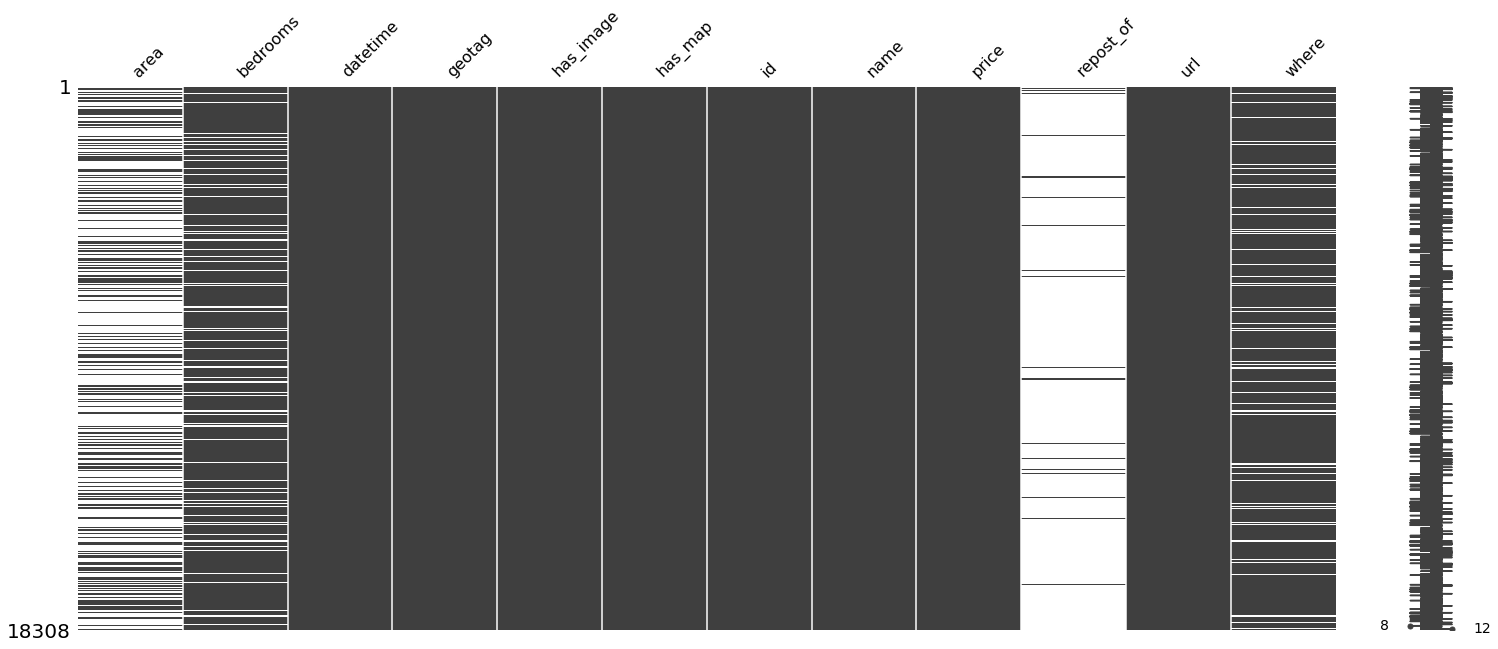

In [20]:
#Missmap Original
msno.matrix(data)

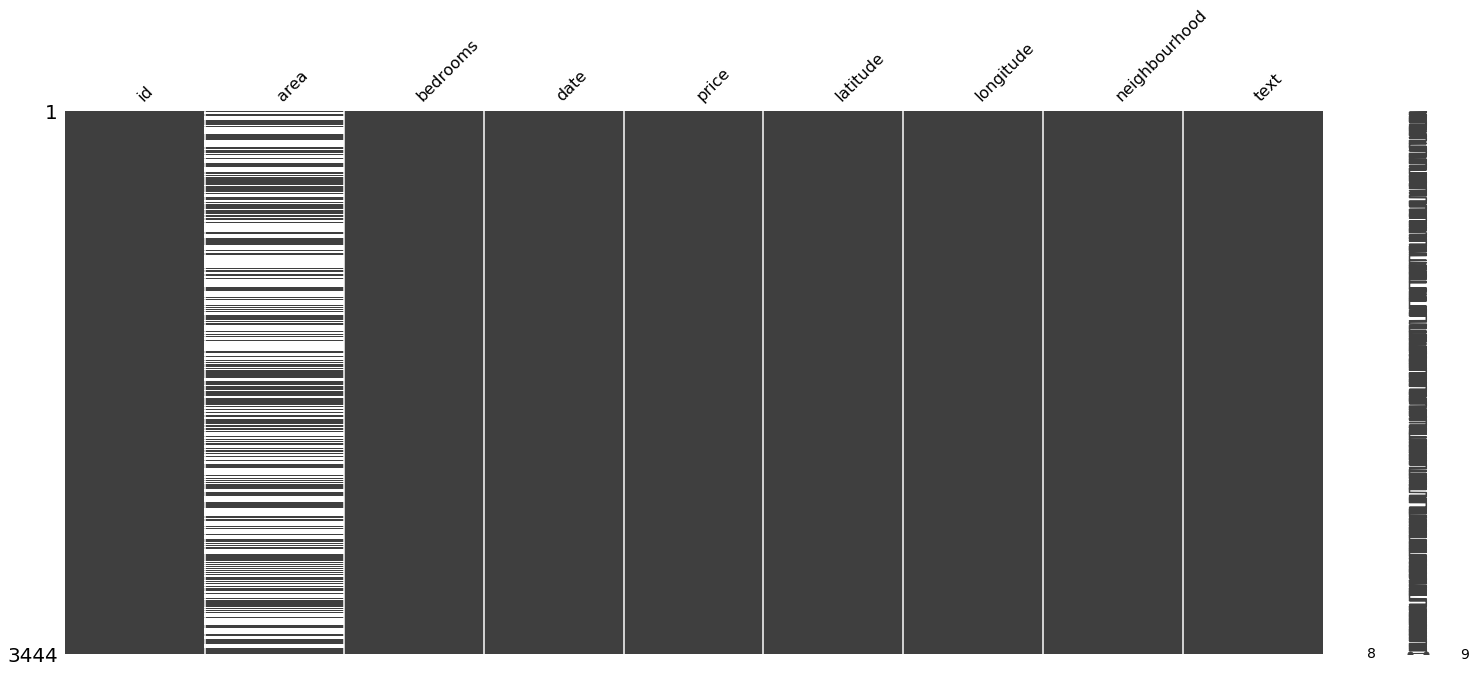

In [21]:
#Missmap after cleaning
msno.matrix(df)

In [22]:
df.dtypes

id                 int64
area              object
bedrooms          object
date              object
price            float64
latitude          object
longitude         object
neighbourhood     object
text              object
dtype: object

In [23]:
df['area'] = pd.to_numeric(df['area'])
df['bedrooms'] = pd.to_numeric(df['bedrooms'])
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])
df.dtypes

C:\Users\Jessee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jessee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jessee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

id                 int64
area             float64
bedrooms         float64
date              object
price            float64
latitude         float64
longitude        float64
neighbourhood     object
text              object
dtype: object

# Data Exploration

I now conduct some data exploration to understand the dataset. We can see below that based on count a signficant number of area inforation is missing. The mean values in the dataset are a bit skewed as the realestate listings include both condos and houses. Another interesting note is the max prices of $500,000,000 which could be an error or an extreme outlier.

In [24]:

df[['area','bedrooms','price']].describe().T

,count,mean,std,min,25%,50%,75%,max
area,1580.0,1519.970886,7.207408e+03,425.0,750.0,1000.0,1625.0,285000.0
bedrooms,3359.0,2.144686,1.083429e+00,1.0,1.0,2.0,3.0,8.0
price,3444.0,988403.277294,8.587122e+06,119000.0,519900.0,650000.0,885750.0,500000000.0


Using a box plot we can see that there is indeed outliers in price that need to be addressed.

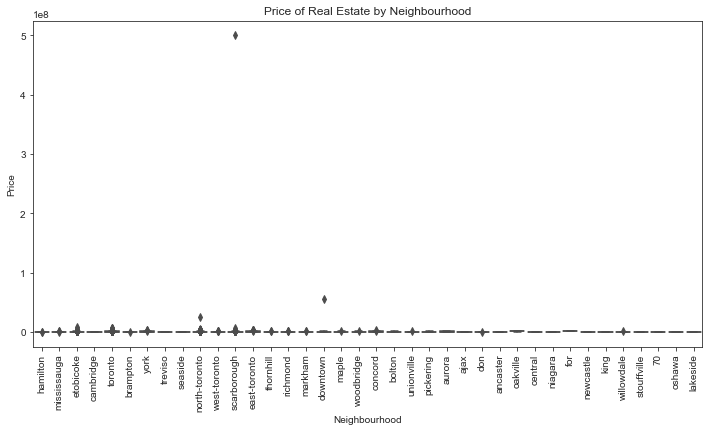

In [25]:
#Boxplot: Identify outliers

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
plt.xticks(rotation=90)
g = sns.boxplot(data = df,x = 'neighbourhood', y = 'price', \
                color="red")
g.set(xlabel='Neighbourhood', ylabel='Price',title='Price of Real Estate by Neighbourhood')
plt.show()

In [26]:
#Initialize all listings as *Not* outlier (False)
df['outlier'] = False
outlier_cutoff = np.percentile(df['price'], 60) #top 40% as threshold
#mark anything over this cutoff as outlier
df.loc[df['price']>=outlier_cutoff, 'outlier'] = True

print('Outlier Threshold:', round(outlier_cutoff,2),"\n\r")
print('Number of outliers: \n\r',df.outlier.value_counts(),"\n\r")


Outlier Threshold: 719897.6 

Number of outliers: 
 False    2066
True     1378
Name: outlier, dtype: int64 



C:\Users\Jessee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jessee\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
#remove outliers
df2=df.loc[df.outlier==False]
df2.is_copy = False

C:\Users\Jessee\Anaconda3\lib\site-packages\pandas\core\generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Jessee\Anaconda3\lib\site-packages\pandas\core\generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


After removing the large outliers, we can see that there still quite a few outliers from the box tails. I opted to not remove these values as the dataset contains both Housing and Condos which can have a great variation in pricing. 

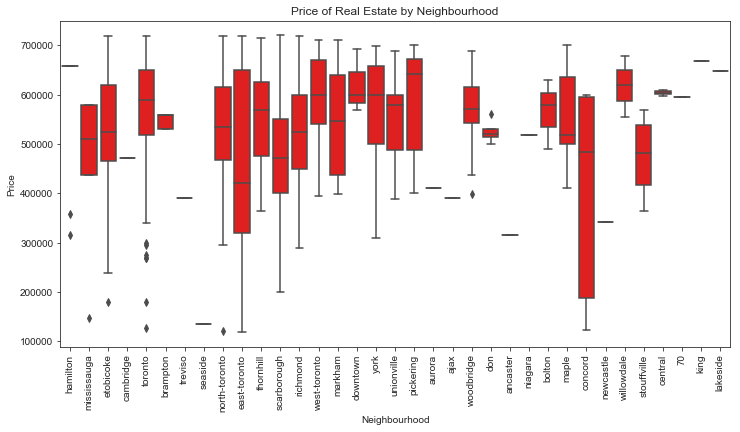

In [29]:
#Boxplot: Identify outliers

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
plt.xticks(rotation=90)
g = sns.boxplot(data = df2,x = 'neighbourhood', y = 'price', \
                color="red")
g.set(xlabel='Neighbourhood', ylabel='Price',title='Price of Real Estate by Neighbourhood')
plt.show()

Looking at price by neighbourhood. We can see that the downtown core has the highest average price. This was an expected result. 

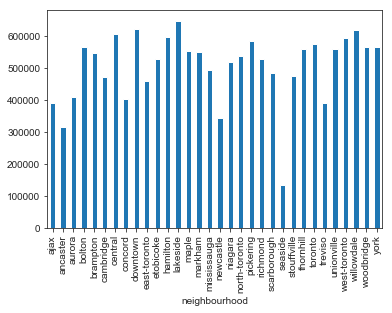

In [31]:
#df2 = df[['neighbourhood','price']]
ppnb = df2.groupby(['neighbourhood'])['price'].mean()
ppnb = ppnb.drop("70", axis=0)
ppnb = ppnb.drop("don", axis=0)
ppnb = ppnb.drop("king", axis=0)
ax = ppnb.plot.bar(rot=90)

The below chart shows the number of postings by region. WE can see again Toronto has the most active postings. Additionally, we can see the aread of growth in Etobicoke, North Toronto (North York), and Scarborough.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

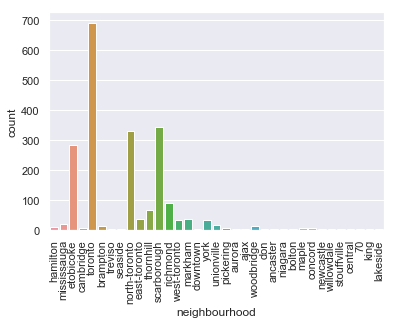

In [32]:
sns.set(style="darkgrid")
bx = sns.countplot(x = "neighbourhood", data=df2)
plt.xticks(rotation=90)
#bx = sns.countplot(x="class", data=ppnb)

In [35]:
#calculate price per bedroom
df2['ppbed'] = df2['price'] / df2['bedrooms']
#calculate price per sqft
df2['pparea'] = df2['price'] / df2['area']

An interesting obeservation from the price per bedroom plot below is that on bedrooms are highest and the price per bedroom cost decreases for two and three bedrooms. This is somewhat expected as one bedrooms are paying for a bedroom and common living area, where as the cost of the common/living area is divided amoung the bedrooms for two and three bedroom units. This trend is somewhat distrupted as the number of bedrooms increases to four and five bedroom units these are most likely houses which are in a completely different price range. 

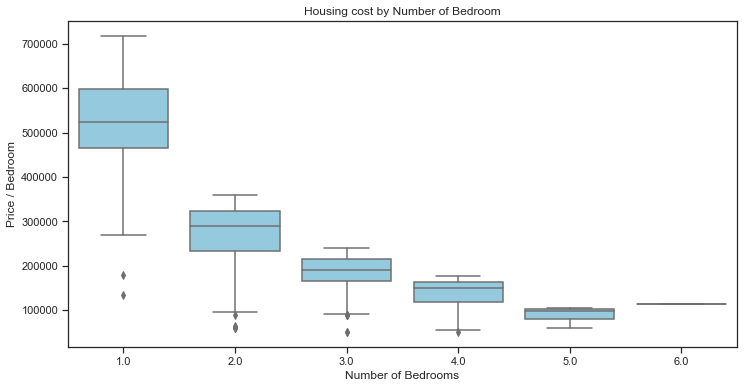

Median Price Per Bedroom
 bedrooms
1.0    525000.000000
2.0    289950.000000
3.0    191666.666667
4.0    149750.000000
5.0     99000.000000
6.0    115000.000000
Name: ppbed, dtype: float64


In [36]:
#Plot price per bedroom 

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
g = sns.boxplot(data = df2,x = 'bedrooms', y = 'ppbed', \
                color="skyblue")
g.set(xlabel='Number of Bedrooms', ylabel='Price / Bedroom',title='Housing cost by Number of Bedroom')
plt.show()

print("Median Price Per Bedroom" "\r\n", df2.groupby(['bedrooms'])['ppbed'].median())

The above trend is further reinforced by looking at a price per area below. 

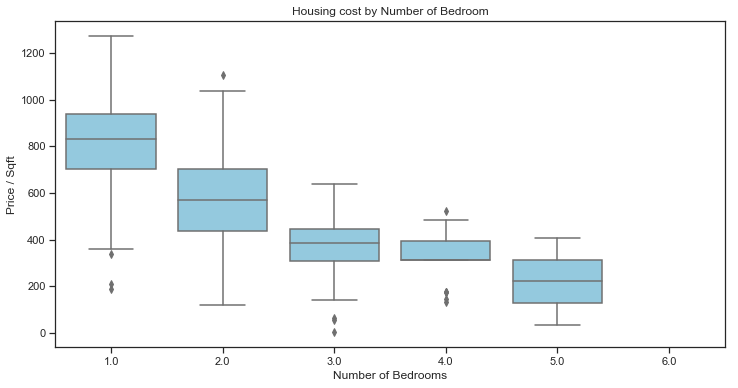

Median Price Per sqft
 bedrooms
1.0    829.230769
2.0    571.904653
3.0    383.522348
4.0    313.809524
5.0    220.755495
6.0           NaN
Name: pparea, dtype: float64
Mean Price Per sqft
 bedrooms
1.0    821.974842
2.0    573.870668
3.0    373.540755
4.0    330.350403
5.0    220.755495
6.0           NaN
Name: pparea, dtype: float64


In [37]:
df2['pparea'] = df2['price'] / df2['area']

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
g = sns.boxplot(data = df2,x = 'bedrooms', y = 'pparea', \
                color="skyblue")
g.set(xlabel='Number of Bedrooms', ylabel='Price / Sqft',title='Housing cost by Number of Bedroom')
plt.show()

print("Median Price Per sqft" "\r\n", df2.groupby(['bedrooms'])['pparea'].median())
print("Mean Price Per sqft" "\r\n", df2.groupby(['bedrooms'])['pparea'].mean())

# Export the cleaned dataset


In [38]:
df2.to_csv( "craigslist_housing_cleaned.csv", index=False, encoding='utf-8-sig')